# Линейная регрессия

## 1. Первичный анализ данных

В этом задании вы будете использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights), содержащие 25 000 синтетических записей роста (в дюймах) и веса (в фунтах). Эти данные были смоделированы на основе проведенного в 1993 году исследования 25 000 человек от рождения до 18 лет. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу в DataFrame `data`:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

После считывания данных нужно посмотреть первые записи. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это также позволяет понять природу признака. Кроме того, благодаря гистограмме можно найти "выбросы" в данных. 

Построим гистограмму распределения роста подростков из `data`. Используем метод `plot` c аргументами `y='Height'` (признак, распределение которого мы строим), `kind='hist'` (тип графика - гистограмма), `color='red'` (цвет - красный).

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

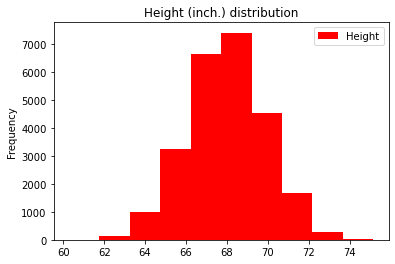

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Посмотрите первые 10 записей с помощью метода `head`. Нарисуйте гистограмму распределения веса. Сделайте гистограмму зеленой, подпишите картинку.

In [5]:
#первые 10 записей:
data.head(10)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024
7,69.80204,141.4947
8,70.01472,136.4623
9,67.90265,112.3723


<AxesSubplot:title={'center':'Weight (inch.) distribution'}, ylabel='Frequency'>

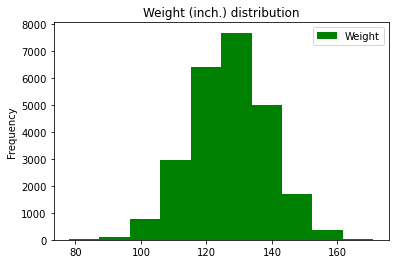

In [6]:
#диаграмма распределения роста:

data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (inch.) distribution')

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Для этого создается $m \times m$ графиков ($m$ - число признаков), где по диагонали - гистограммы распределения признаков, а вне диагонали - зависимости двух признаков. Вы можете сделать это с помощью метода [`scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) из библиотеки Pandas. 

Чтобы проиллюстрировать этот метод, cоздадим признак [Индекс массы тела](https://ru.wikipedia.org/wiki/Индекс_массы_тела).

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод [`scatter_matrix`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

array([[<AxesSubplot:xlabel='Height', ylabel='Height'>,
        <AxesSubplot:xlabel='Weight', ylabel='Height'>,
        <AxesSubplot:xlabel='BMI', ylabel='Height'>],
       [<AxesSubplot:xlabel='Height', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>,
        <AxesSubplot:xlabel='BMI', ylabel='Weight'>],
       [<AxesSubplot:xlabel='Height', ylabel='BMI'>,
        <AxesSubplot:xlabel='Weight', ylabel='BMI'>,
        <AxesSubplot:xlabel='BMI', ylabel='BMI'>]], dtype=object)

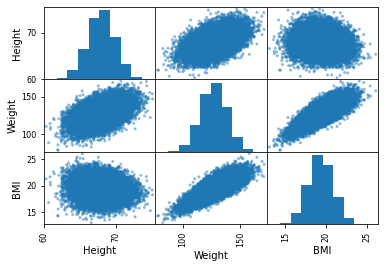

In [10]:
pd.plotting.scatter_matrix(data)

При анализе данных бывает необходимо исследовать зависимость количественного признака от категориального (например, зарплаты от пола сотрудника). В этом помогут [диаграммы размаха (или box plots)](https://ru.wikipedia.org/wiki/Ящик_с_усами). Диаграмма размаха позволяет показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

Создайте в DataFrame `data` новый признак `weight_category` (весовая категория), который будет иметь 3 значения: 1 – если вес меньше 120 фунтов, 3 - если вес больше или равен 140 фунтов, 2 – в остальных случаях. Постройте диаграмму размаха, демонстрирующую зависимость роста от весовой категории. Используйте методы [`boxplot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) и [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) Pandas.

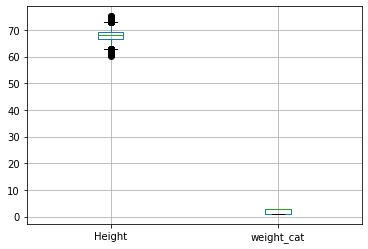

In [111]:
def weight_category(weight):
    if weight < 120: return 1
    elif weight >= 120: return 3
    else: return 2

#добавим столбец:
data['weight_cat'] = data['Weight'].apply(weight_category)
#ящик с усами
boxplot = data.boxplot(column=['Height', 'weight_cat'])

Постройте scatter plot зависимости роста от веса, используя метод [`plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) с аргументом `kind='scatter'`. Подпишите картинку.

<AxesSubplot:title={'center':'relationship between Height and Weight'}, xlabel='Weight', ylabel='Height'>

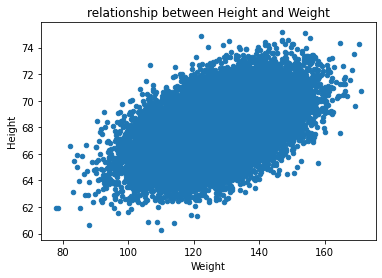

In [22]:
data.plot(x="Weight" , y="Height", kind='scatter', title='relationship between Height and Weight')

## 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
где $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [82]:
def mserror(w0, w1, y, x):
    return np.sum((y - (w0+w1*x)) ** 2)

Ваша задача провести прямую линию в пространстве признаков "Рост"-"Вес" так, чтобы минимизировать функционал, указанный выше, через точки, соответствующие наблюдениям из набора данных. 

Проведите на графике зависимости роста от веса, который вы строили ранее, две прямые, соответствующие значениям параметров $(w_0, w_1) = (60, 0.05)$ и $(w_0, w_1) = (50, 0.16)$. Используйте метод `plot` из `matplotlib.pyplot`, а также `linspace` библиотеки `numpy`. Подпишите оси и график.

In [53]:
max(data['Weight'])

170.924

In [64]:
min(data['Weight'])

78.01476

In [65]:
y1=60+0.05*x
y2=50+0.16*x

Text(0.5, 0, 'Weight')

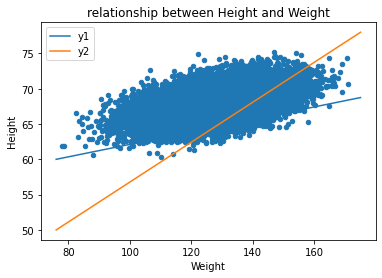

In [71]:
df = data.plot(x="Weight" , y="Height", kind='scatter', title='relationship between Height and Weight')

x=np.linspace(76, 175)
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')

plt.legend()
plt.ylabel('Height')
plt.xlabel('Weight')

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0 = 50$ и оцените, как функция ошибки зависит от одного параметра (наклон прямой), если второй (свободный член) зафиксировать. Подпишите оси и график.

Text(0.5, 1.0, 'Зависимость ошибки от параметра w')

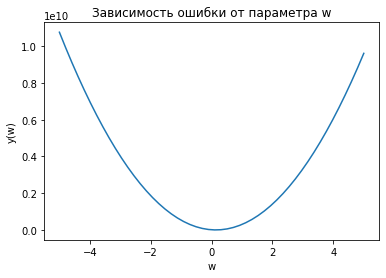

In [95]:
#зададим массив для функции ошибки. не очень красиво, зато работает
y=[]
for w in np.linspace (-5, 5):
    y.append(mserror(50, w, data['Height'], data['Weight']))

#построим график
w=np.linspace(-5, 5)
plt.plot(w, y)
plt.ylabel('y(w)')
plt.xlabel('w')
plt.title('Зависимость ошибки от параметра w')

Теперь методом оптимизации найдите "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

С помощью метода [`minimize_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) из `scipy.optimize` найдите минимум функции, определенной ранее, для значений параметра  $w_1$ в диапазоне $[-5,5]$. Проведите на графике зависимости роста от веса прямую, соответствующую значениям параметров $(w_0, w_1) = (50, w_1^{opt})$, где $w_1^{opt}$ – найденное оптимальное значение параметра $w_1$. 

In [97]:
#перепишем старую функцию ошибки как функцию только w1
#чтобы можно было пользоваться minimize_scalar

def mserror_(w1):
    return np.sum((data['Height'] - (50+w1*data['Weight'])) ** 2)

In [107]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(mserror_)
res.x

numpy.float64

Text(0.5, 0, 'Weight')

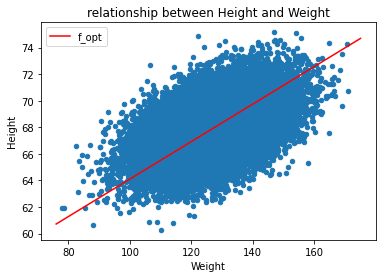

In [109]:
#выведем графики:
df = data.plot(x="Weight" , y="Height", kind='scatter', title='relationship between Height and Weight')

x=np.linspace(76, 175)
f=50+(res.x)*x
plt.plot(x, f, label='f_opt', color = 'red')

plt.legend()
plt.ylabel('Height')
plt.xlabel('Weight')

При анализе данных часто хочется получить интуитивное и интерпретируемое представление о природе данных с помощью визуализации. При числе признаков больше 3 такие картинки нарисовать невозможно, поэтому для визуализации данных выделяют 2 или 3 главные компоненты и отображают на плоскости или в объеме. 

Посмотрите, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала $[-5,5]$ c шагом $0.25$.

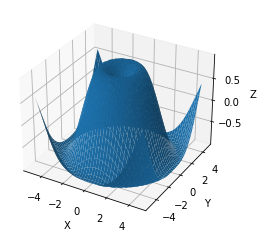

(40, 40)

In [165]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У.
# Используем метод meshgrid для создания матрицы по массивам. 
# Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Используем метод plot_surface объекта типа Axes3DSubplot.
# Подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

X.shape

Постройте 3D-график зависимости функции ошибки от параметров $w_0$ и $w_1$. Подпишите ось $x$ «Intercept», ось $y$ – «Slope», a ось $z$ – «Error».

In [186]:
# перепишем функцию:
def mserror1(w0, w1):
    return np.sum((data['Height'] - (w0+w1*data['Weight'])) ** 2)

In [187]:
# Задаем нужную функцию Z(x, y).
X = np.linspace(-100,100, num=40)
Y = np.linspace(-5, 5, num=40)
Z = []
for w0 in np.linspace(100,100, num=40):
    for w1 in np.linspace(-5, 5, num=40):
        Z.append(mserror1(w0, w1))
Z = np.array(Z)
Z = Z.reshape ((40), (40))

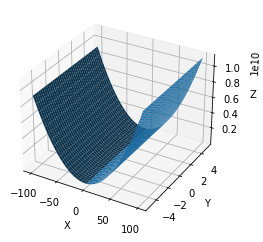

In [188]:
#создадим график:

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(X, Y)
# Используем метод plot_surface объекта типа Axes3DSubplot.
# Подписываем оси.
surf = ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

С помощью метода `minimize` из `scipy.optimize` найдите минимум функции ошибки для значений параметра $w_0$ в диапазоне $[-100,100]$ и $w_1$ - в диапазоне $[-5, 5]$. Начальная точка – $(w_0, w_1) = (0, 0)$. Используйте метод оптимизации L-BFGS-B (аргумент `method` метода `minimize`). Проведите на графике зависимости роста от веса прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [189]:
from scipy.optimize import minimize
x0 = (0, 0)
bounds = [(-100,100),(-5,5)]
res1 = minimize(mserror1, x0, method='L-BFGS-B', bounds=bounds)

TypeError: mserror1() missing 1 required positional argument: 'w1'